In [4]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
salarys = pd.read_csv('Salary_data.csv')
salarys.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [31]:
salarys.columns = ['years', 'salary']
salarys.head()

,years,salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


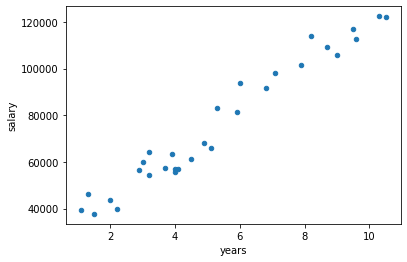

In [32]:
salarys.plot.scatter(x='years', y='salary')
plt.show()

In [33]:
regression_model = LinearRegression()
regression_model.fit(salarys[['years']].salarys['salary'])

AttributeError: 'DataFrame' object has no attribute 'salarys'

In [34]:
print(regression_model.coef_, regression_model.intercept_)

AttributeError: 'LinearRegression' object has no attribute 'coef_'

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

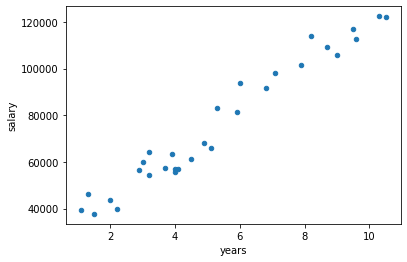

In [35]:
salarys.plot.scatter(x='years', y='salary')
plt.plot(salarys['years'], regression_model.predict(salarys[['years']]))
plt.show()

In [36]:
marketings = pd.read_csv('Marketing_data.csv')
marketings.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [37]:
Xs = marketings[['youtube', 'facebook' , 'newspaper']]
Y = marketings['sales']

rm=LinearRegression().fit(Xs,Y)
print(rm.coef_, rm.intercept_)

[0.04523544 0.18839783 0.00427949] 3.5058709944650186


In [41]:
conda install -c conda-forge statsmodels

Solving environment: done

## Package Plan ##

  environment location: /Users/jaunnnngspc/opt/anaconda3/envs/fakepython

  added / updated specs:
    - statsmodels


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2021.10.8  |       h033912b_0         139 KB  conda-forge
    certifi-2021.10.8          |   py39h6e9494a_2         144 KB  conda-forge
    libblas-3.9.0              |14_osx64_openblas          12 KB  conda-forge
    libcblas-3.9.0             |14_osx64_openblas          12 KB  conda-forge
    libgfortran-5.0.0          |9_3_0_h6c81a4c_23          19 KB  conda-forge
    libgfortran5-9.3.0         |      h6c81a4c_23         1.7 MB  conda-forge
    liblapack-3.9.0            |14_osx64_openblas          12 KB  conda-forge
    libopenblas-0.3.20         |openmp_hb3cd9ec_0         9.6 MB  conda-forge
    llvm-openmp-14.0.3         |       ha654fa7_0         327 KB  

In [38]:
# sklearn
from sklearn.metrics import r2_score, mean_squared_error

In [39]:
fitted = rm.predict(Xs)

In [40]:
print('RMSE:', np.sqrt(mean_squared_error(Y, fitted)))
print('R2_score: ', r2_score(Y,fitted)) #이걸 더 많이 사용함 무조건 0~1사이값중에 나타나므로 

RMSE: 1.986270329030222
R2_score:  0.9004752358539351


In [43]:
import statsmodels.api as sm

In [44]:
Xs = marketings[['youtube', 'facebook' , 'newspaper']]
Y = marketings['sales']

Xs=sm.add_constant(Xs)
rm=sm.OLS(Y, Xs).fit()

In [45]:
rm.predict(Xs)

0      11.164980
1      26.025064
2      13.766342
3       9.275311
4      22.446400
         ...    
166     6.486818
167     9.768662
168    15.249266
169    28.735611
170    18.093790
Length: 171, dtype: float64

In [46]:
rm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     503.7
Date:                Mon, 09 May 2022   Prob (F-statistic):           2.09e-83
Time:                        13:38:13   Log-Likelihood:                -359.99
No. Observations:                 171   AIC:                             728.0
Df Residuals:                     167   BIC:                             740.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5059      0.400      8.772      0.000       2.717       4.295
youtube        0.0452      0.002     29.830      0.000       0.042       0.048
facebook       0.1884      0.009     20.895      0.000       0.171       0.206
newspaper      0.0043      0.007      0.658      0.511      -0.009       0.017
==============================================================================
Omnibus:                       57.934   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.792
Skew:                          -1.388   Prob(JB):                     4.47e-36
Kurtosis:                       6.891   Cond. No.                         544.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Model Selection
# 성능이 비슷하면 변수가 적은 모델을 사용하는 것이 좋음 경제성이나 등등 고려해서

In [ ]:
#위에서 newspaper가 P>|t| 가 0.05보다 커서 영향력이 작아 변수제거해서 모델만들기

In [47]:
Xs = marketings[['youtube', 'facebook']]
Y = marketings['sales']

Xs=sm.add_constant(Xs)
rm=sm.OLS(Y, Xs).fit()
rm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     757.8
Date:                Mon, 09 May 2022   Prob (F-statistic):           8.33e-85
Time:                        13:48:48   Log-Likelihood:                -360.21
No. Observations:                 171   AIC:                             726.4
Df Residuals:                     168   BIC:                             735.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5937      0.376      9.555      0.000       2.851       4.336
youtube        0.0453      0.002     30.060      0.000       0.042       0.048
facebook       0.1901      0.009     22.045      0.000       0.173       0.207
==============================================================================
Omnibus:                       59.525   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.220
Skew:                          -1.411   Prob(JB):                     1.47e-38
Kurtosis:                       7.061   Cond. No.                         507.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# prediction_interval 은 예측값이 가질수 있는 범위를 표현하기 위해 사용: 책참고해서 한번 더 보기

In [ ]:
# 다중공선성 파악하는 방법
# 1. 독립변수간에 산점도 / corr
# 2. VIF

In [48]:
house_prices = pd.read_csv('house_prices.csv')
house_prices.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price
0,1112,B,1188,3,2,ranch,598291
1,491,B,3512,5,3,victorian,1744259
2,5952,B,1134,3,2,ranch,571669
3,3525,A,1940,4,2,ranch,493675
4,5108,B,2208,6,4,victorian,1101539


In [51]:
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [50]:
pip install seaborn

     |████████████████████████████████| 292 kB 5.8 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [52]:
Xs = house_prices[['area', 'bedrooms','bathrooms']]
Y= house_prices['price']

Xs=sm.add_constant(Xs)

rm = sm.OLS(Y, Xs).fit()
rm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     4230.
Date:                Mon, 09 May 2022   Prob (F-statistic):               0.00
Time:                        14:06:41   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6024   BIC:                         1.691e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.007e+04   1.04e+04      0.972      0.331   -1.02e+04    3.04e+04
area         345.9110      7.227     47.863      0.000     331.743     360.079
bedrooms   -2925.8063   1.03e+04     -0.285      0.775    -2.3e+04    1.72e+04
bathrooms   7345.3917   1.43e+04      0.515      0.607   -2.06e+04    3.53e+04
==============================================================================
Omnibus:                      367.658   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              350.116
Skew:                           0.536   Prob(JB):                     9.40e-77
Kurtosis:                       2.503   Cond. No.                     1.16e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# bedrooms 계수가 음수인게 이상해서 다중공정성 해보기! 상식적으로 침실이 많을 수로 집값이 떨어지는게 이상!

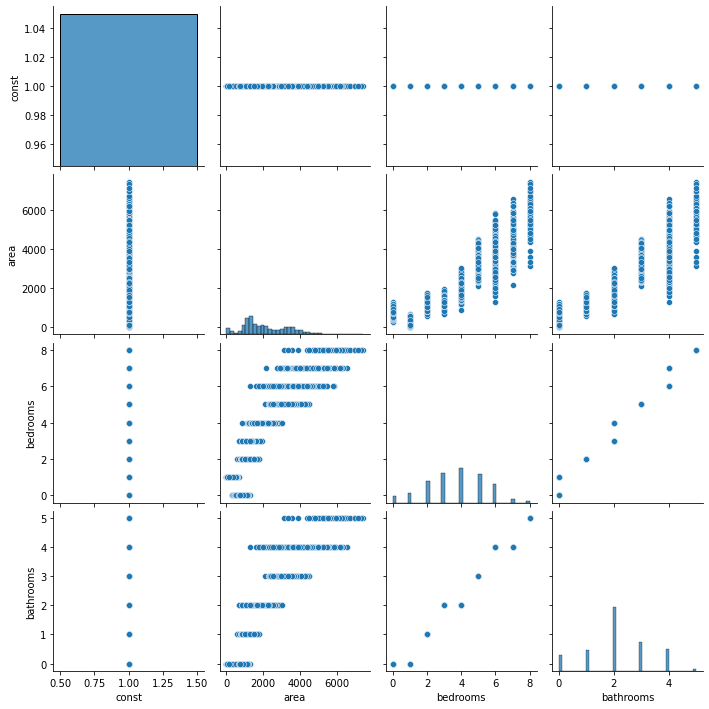

In [55]:
sns.pairplot(Xs)
plt.show()

In [56]:
house_prices.corr(method='pearson')

,house_id,area,bedrooms,bathrooms,price
house_id,1.000000,0.005591,0.008959,0.011725,0.005768
area,0.005591,1.000000,0.901623,0.891481,0.823454
bedrooms,0.008959,0.901623,1.000000,0.972768,0.743435
bathrooms,0.011725,0.891481,0.972768,1.000000,0.735851
price,0.005768,0.823454,0.743435,0.735851,1.000000


In [ ]:
# VIF: 어떤 독립변수가 다른 독립변수들과 선형관계를 가지는지 확인할 수 있는 지표

In [62]:
Xs = house_prices[['area', 'bedrooms','bathrooms']]
Y= house_prices['price']

Xs=sm.add_constant(Xs)

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(Xs.values, i) for i in range(Xs.shape[1])]
vif['predictor'] = Xs.columns
print(vif)
# 5이상 유의. 10이상: 다중공선성이 있다고 판단-> 변수 제거해서 사용

         VIF  predictor
0   7.327102      const
1   5.458190       area
2  20.854484   bedrooms
3  19.006851  bathrooms


In [59]:
Xs.shape

(6028, 4)

In [60]:
Xs.values

array([[1.000e+00, 1.188e+03, 3.000e+00, 2.000e+00],
       [1.000e+00, 3.512e+03, 5.000e+00, 3.000e+00],
       [1.000e+00, 1.134e+03, 3.000e+00, 2.000e+00],
       ...,
       [1.000e+00, 1.518e+03, 2.000e+00, 1.000e+00],
       [1.000e+00, 2.270e+03, 4.000e+00, 2.000e+00],
       [1.000e+00, 3.355e+03, 5.000e+00, 3.000e+00]])